<a href="https://colab.research.google.com/github/AkshayBhansali18/Fastai/blob/master/TabularData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *

In [0]:
from fastai.tabular import *

In [0]:
path=untar_data(URLs.ADULT_SAMPLE)

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/adult_sample/adult.csv'),
 PosixPath('/root/.fastai/data/adult_sample/models'),
 PosixPath('/root/.fastai/data/adult_sample/export.pkl')]

In [0]:
df=pd.read_csv(path/'adult.csv')

In [28]:
df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k
5,20,Private,63210,HS-grad,9.0,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,15,United-States,<50k
6,49,Private,44434,Some-college,10.0,Divorced,NaN,Other-relative,White,Male,0,0,35,United-States,<50k
7,37,Private,138940,11th,7.0,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<50k
8,46,Private,328216,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>=50k
9,36,Self-emp-inc,216711,HS-grad,NaN,Married-civ-spouse,NaN,Husband,White,Male,99999,0,50,?,>=50k


In [8]:
df.shape

(32561, 15)

In [0]:
cat_var=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
cont_var=['age','fnlwgt','education-num','hours-per-week']
procs=[FillMissing,Categorify,Normalize]
dep_var='salary'

In [0]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_var, cont_names=cont_var)


In [0]:
data=(TabularList.from_df(df,cat_names=cat_var,cont_names=cont_var,procs=procs).split_by_idx(list(range(800,1000)))
                        .label_from_df(cols=dep_var)
                        .add_test(test,label=0)
                        .databunch())

In [25]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,age,fnlwgt,education-num,hours-per-week,target
Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Male,United-States,False,-1.5090,-0.4532,-0.4224,-1.4936,<50k
State-gov,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,False,0.2502,0.0031,1.1422,0.7743,>=50k
Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,False,-0.4095,-1.4671,-0.0312,0.3694,<50k
Private,HS-grad,Divorced,Craft-repair,Own-child,White,Male,United-States,False,0.1036,1.9023,-0.4224,-0.0356,<50k
?,Some-college,Never-married,?,Own-child,White,Female,Japan,False,-1.4357,-1.2552,-0.0312,-0.8456,<50k
Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,False,-1.0692,0.2960,-0.0312,1.5843,<50k
Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,Canada,False,0.4701,0.5420,1.1422,2.5563,>=50k
Private,10th,Never-married,Handlers-cleaners,Other-relative,Other,Male,United-States,False,-1.1425,0.2755,-1.5958,-0.0356,<50k
Private,11th,Divorced,Other-service,Not-in-family,White,Female,United-States,False,-0.3362,1.0063,-1.2046,2.3943,<50k
Private,HS-grad,Never-married,Other-service,Not-in-family,White,Female,?,False,-1.2158,-0.1758,-0.4224,0.6124,<50k


In [0]:
learn=tabular_learner(data,layers=[200,100],metrics=accuracy)

In [30]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.352371,0.363446,0.825000,00:07


In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


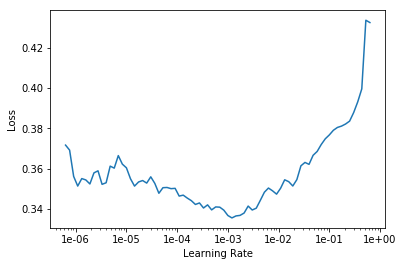

In [32]:
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.350989,0.394543,0.785000,00:07
1,0.352519,0.364951,0.835000,00:07
2,0.336486,0.352155,0.840000,00:07
3,0.337859,0.354337,0.835000,00:07
